In [1]:
# 1. Import libraries
import pandas as pd

# 2. Load the dataset
df = pd.read_csv('../data/raw/data.csv')

# 3. Display the shape and data types
print("Shape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# 4. Show the first few rows
df.head()

Shape of the dataset: (95662, 16)

Data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
# Summary statistics for numerical columns
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


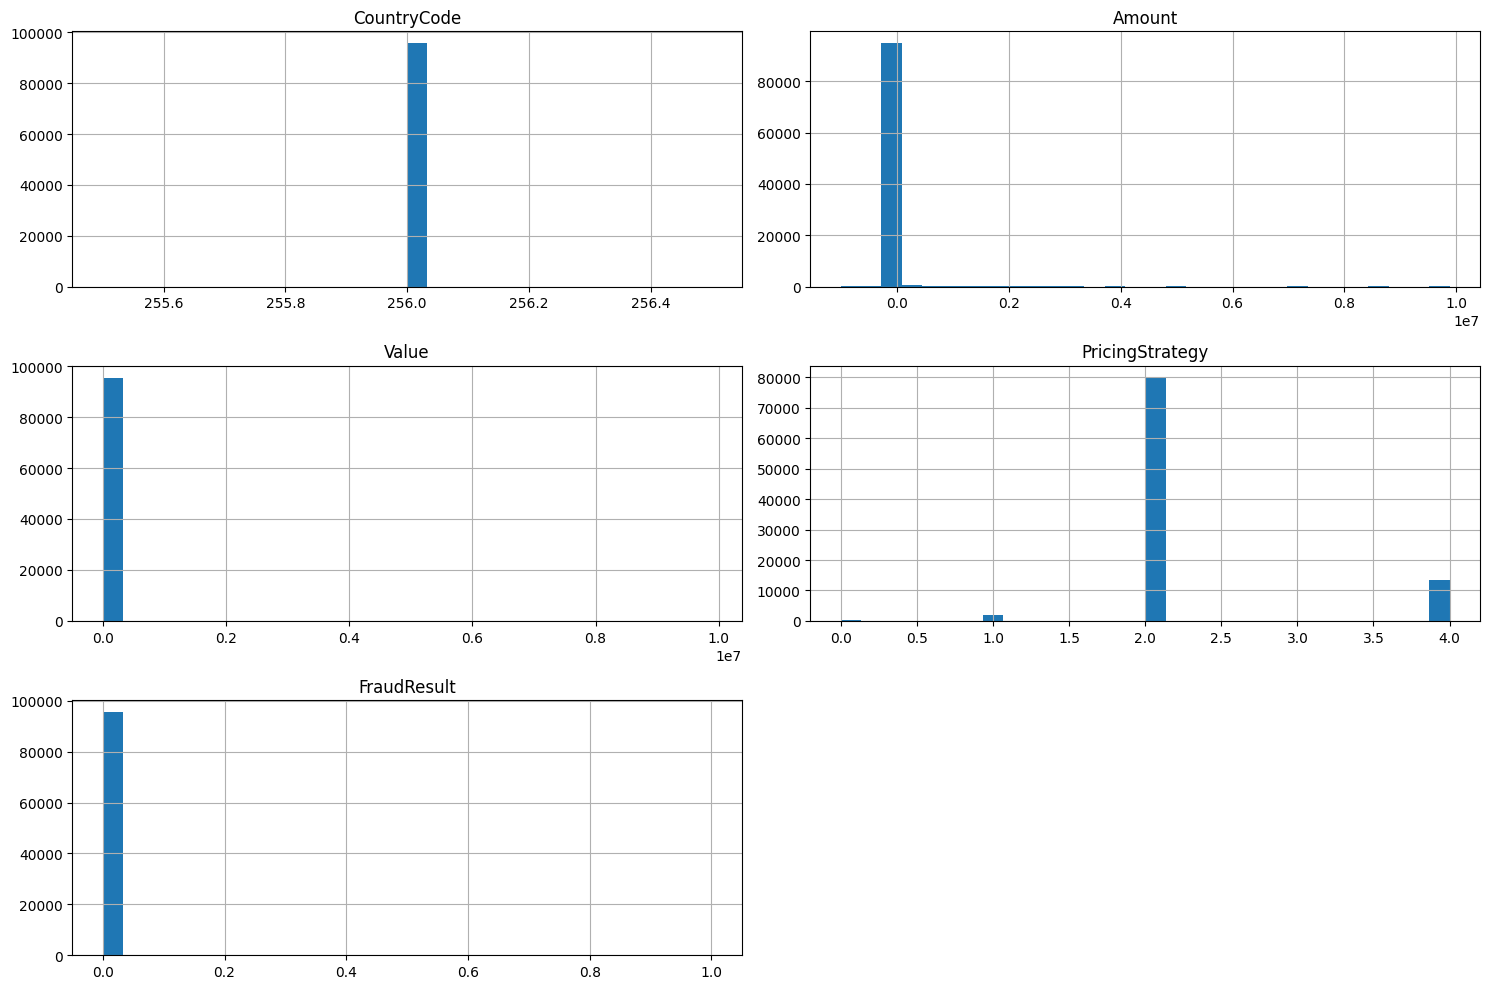

In [3]:
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

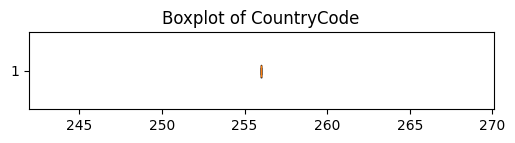

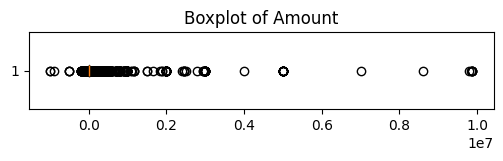

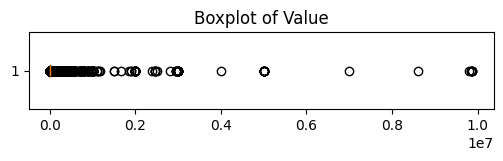

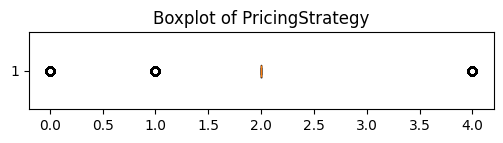

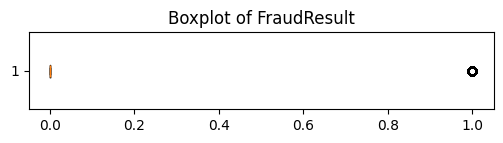

In [4]:
# Boxplots for numerical columns
for col in num_cols:
    plt.figure(figsize=(6, 1))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.show()


Value counts for TransactionId:
TransactionId
TransactionId_35670    1
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
Name: count, dtype: int64


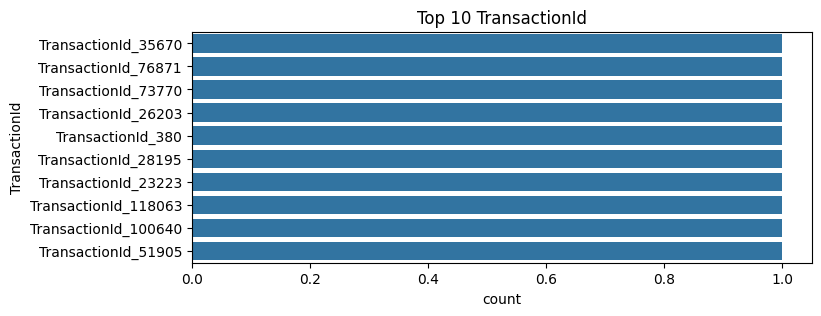


Value counts for BatchId:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64


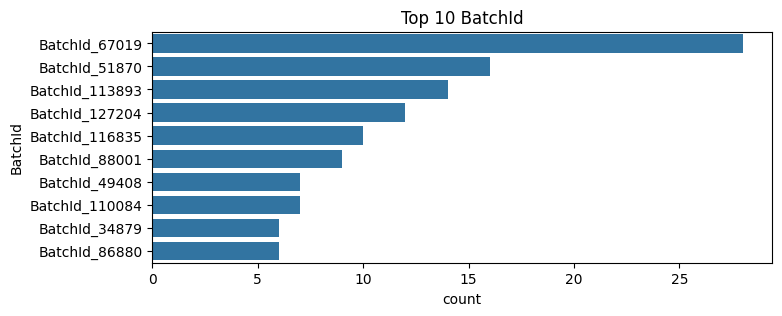


Value counts for AccountId:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64


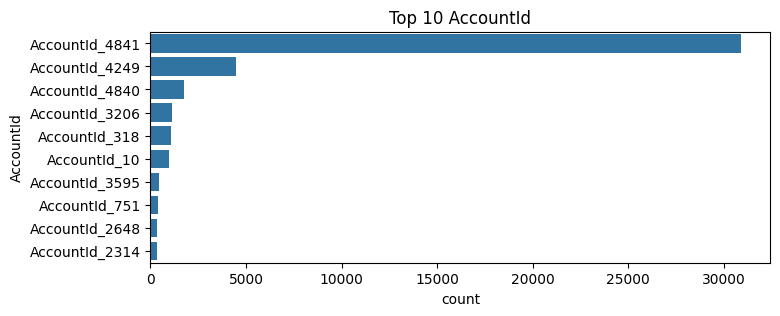


Value counts for SubscriptionId:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64


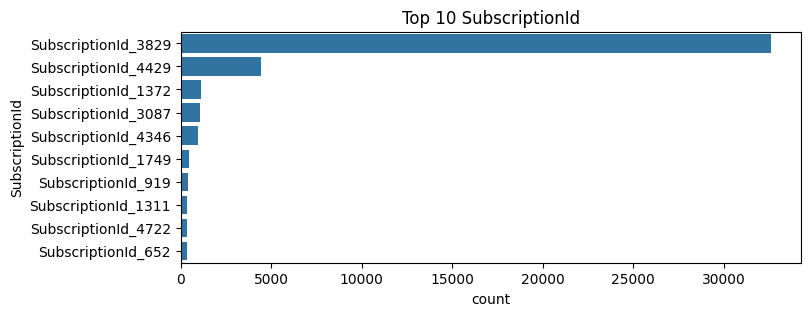


Value counts for CustomerId:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
Name: count, dtype: int64


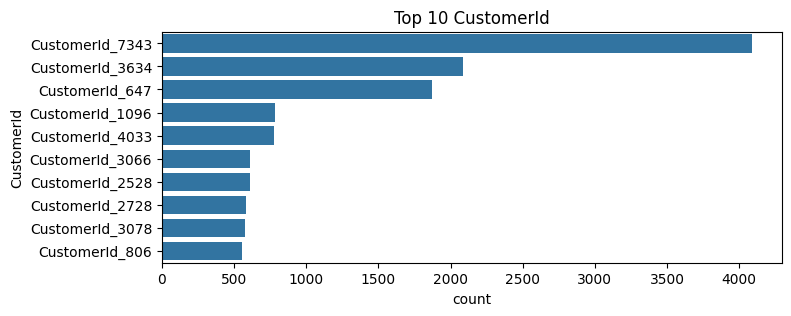


Value counts for CurrencyCode:
CurrencyCode
UGX    95662
Name: count, dtype: int64


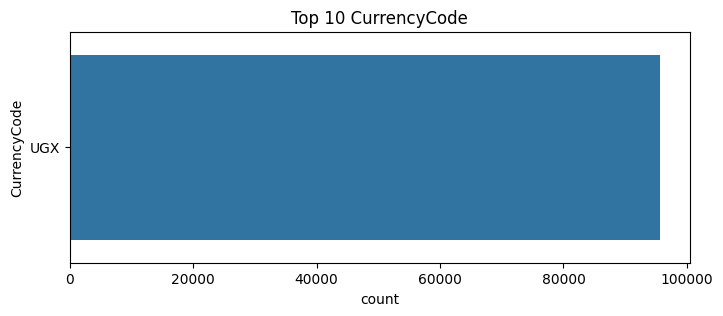


Value counts for ProviderId:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
Name: count, dtype: int64


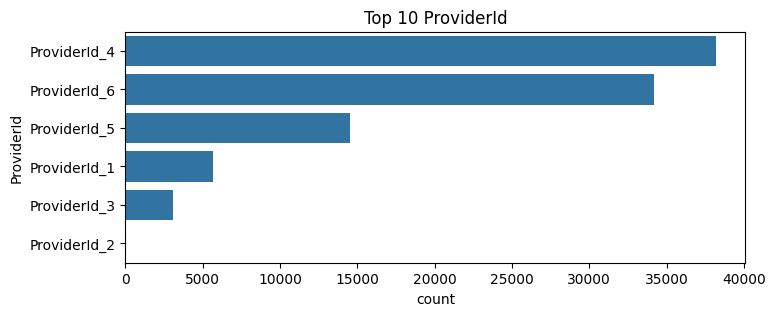


Value counts for ProductId:
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
Name: count, dtype: int64


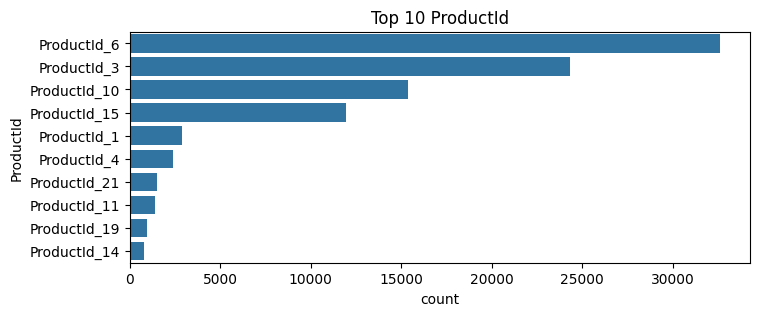


Value counts for ProductCategory:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64


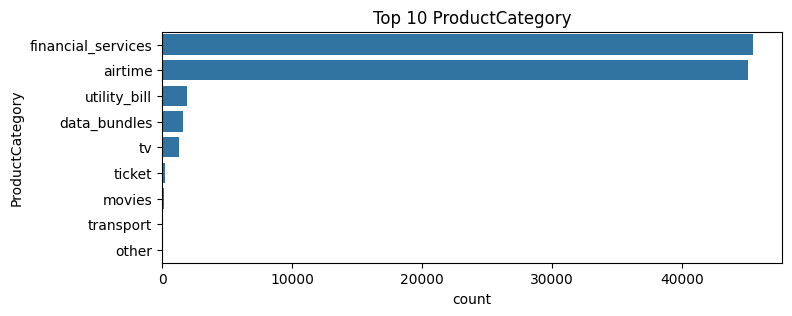


Value counts for ChannelId:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


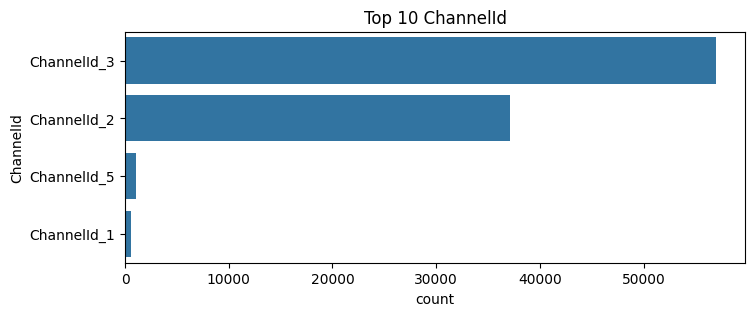


Value counts for TransactionStartTime:
TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
Name: count, dtype: int64


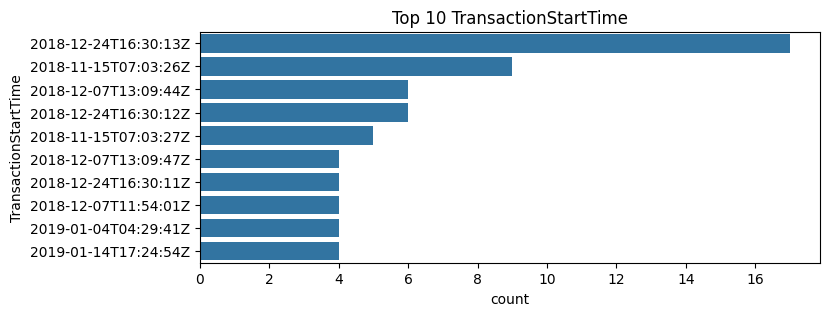

In [5]:
import seaborn as sns

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Show value counts for each categorical column (top 5 categories)
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head())

    # Bar plot for top 10 categories
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df, y=col, order=df[col].value_counts().head(10).index)
    plt.title(f'Top 10 {col}')
    plt.show()

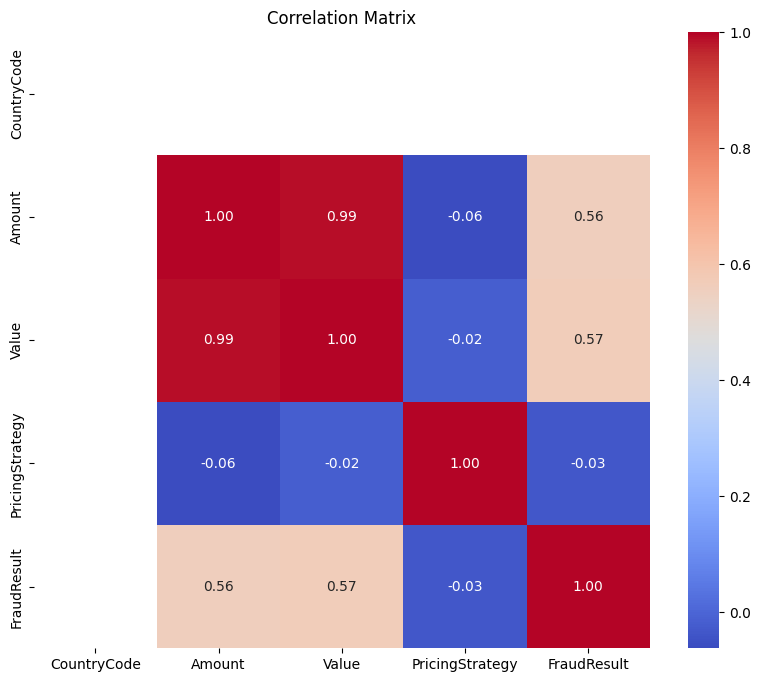

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


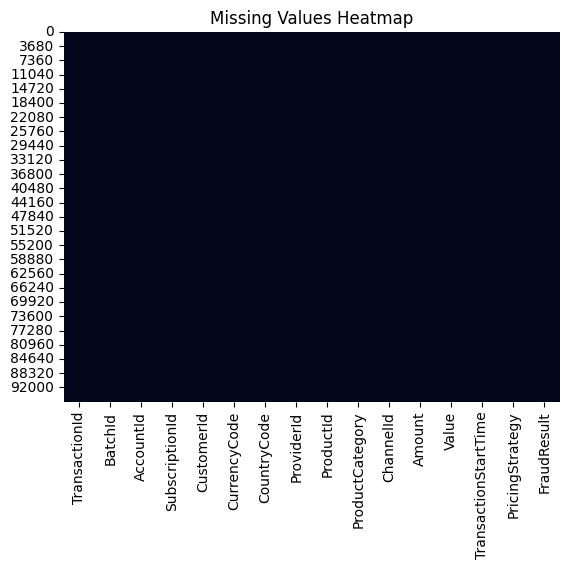

In [11]:
# Count missing values per column
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
# Outlier detection for 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Amount': {outliers.shape[0]}")

Number of outliers in 'Amount': 24441


## Key Insights from EDA

- The dataset contains 95,662 transactions with 16 features.
- Most transactions are in the 'UGX' currency and country code 256.
- The 'Amount' feature is highly skewed with several large outliers.
- Product categories and channels are dominated by a few values.
- There are [X] missing values in [columns], which will need to be addressed.